In [1]:
#Reference Links
# https://colab.research.google.com/drive/1_hiUXcX6DwGEsPP2iE7i-HAs-5HqQrSe?usp=sharing   - for text classification
# https://www.youtube.com/watch?v=dkpS2g4K08s  - for adding class weights for imbalanced dataset

In [2]:
#Below libraries are installed

#!pip install tf-nightly --quiet --upgrade
#!pip install tensorflow 
#!pip install keras

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from keras.layers import Layer
from keras.layers import TextVectorization
import re
import string
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

In [4]:
# import numpy as np 
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
# from keras.callbacks import EarlyStopping
# from keras.layers import Dropout
# import re
# from nltk.corpus import stopwords
# from nltk import word_tokenize
# import nltk
# nltk.download('stopwords')
# STOPWORDS = set(stopwords.words('english'))
# from bs4 import BeautifulSoup
# import plotly.graph_objs as go
# #import plotly.plotly as py
# import cufflinks
# from IPython.core.interactiveshell import InteractiveShell
# import plotly.figure_factory as ff
# InteractiveShell.ast_node_interactivity = 'all'
# from plotly.offline import iplot
# cufflinks.go_offline()
# cufflinks.set_config_file(world_readable=True, theme='pearl')

In [5]:
# import os
# import tensorflow as tf
# from tensorflow import keras
# # from tensorflow.keras.layers import *
# from tensorflow.keras.layers import Layer, InputSpec
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# import string
# import random
# import tensorflow_datasets as tfds

In [6]:
# !pip install contractions
# !pip install textsearch
# !pip install tqdm
# import nltk
# nltk.download('punkt')

In [7]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Conv1D
# from tensorflow.keras.layers import MaxPooling1D
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing import sequence
# from sklearn.preprocessing import LabelEncoder

# # fix random seed for reproducibility
# seed = 42
# np.random.seed(seed)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# # Reading email_column csv file

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TDC_terms_mapped_colums_list.csv')

In [10]:
df

,Name,Object_Id,Native_Type,Object_Type,Term,Table_Name,Schema_Name,tmp_Model_Name,Platform
0,ACCT_HLDR_NAME,601828_6993,COLUMN,Column,Account Holder Name,EB_TRX_DTL_ACCT,CGS6,SIRIUS_SCORE_US,AWS Redshift
1,ACCT_HOLDER_NAME,601828_5591,COLUMN,Column,Account Holder Name,CEB_VEU_ACCT_INFO,CGS6,SIRIUS_SCORE_US,AWS Redshift
2,accountinfo,694987_18836,COLUMN,Column,Account Information,intrctn_call_incdt_oracle_iad_archive,edo_edm_external,Redshift_edw-prod,AWS Redshift
3,accountinfo,694987_17433,COLUMN,Column,Account Information,intctrn_pega_cep_interaction,edo_edm_external,Redshift_edw-prod,AWS Redshift
4,accountinfo,695030_18836,COLUMN,Column,Account Information,intrctn_call_incdt_oracle_iad_archive,edo_spectrum_datalake,Redshift_edw-prod-rpt-consumer,AWS Redshift
...,...,...,...,...,...,...,...,...,...
52185,ZipCode4,578981_1149,COLUMN,Column,Zip Extension,ODSSERVICESNAPSHOT,UP_XMSODS,Teradata_Misc_Vantage,Teradata Vantage
52186,ZipCode4,578981_422,COLUMN,Column,Zip Extension,ODSACCOUNTSNAPSHOT,UP_XMSODS,Teradata_Misc_Vantage,Teradata Vantage
52187,ZipCode4,551000_1994,COLUMN,Column,Zip Extension,odsaccountsnapshot,UP_INTERNAL_ODS,Teradata_Misc_Vantage,Teradata Vantage
52188,ZipCode4,551000_1928,COLUMN,Column,Zip Extension,odsaccountdelta,UP_INTERNAL_ODS,Teradata_Misc_Vantage,Teradata Vantage


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52190 entries, 0 to 52189
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            52190 non-null  object
 1   Object_Id       52190 non-null  object
 2   Native_Type     48942 non-null  object
 3   Object_Type     52190 non-null  object
 4   Term            52190 non-null  object
 5   Table_Name      52190 non-null  object
 6   Schema_Name     52190 non-null  object
 7   tmp_Model_Name  52190 non-null  object
 8   Platform        49505 non-null  object
dtypes: object(9)
memory usage: 3.6+ MB


In [12]:
# Dropping unwanted columns
#df.drop([ 'database_nm', 'db_cluster', 'schema_nm', 'table_nm','privacy_tier','created_ts','updated_ts','update_flag'], axis=1, inplace=True)
#df.drop(['seq_num', 'Object_Id', 'Native_Type', 'tmp_Model_Name', 'Platform', 'Object_Type','Table_Name','Schema_Name'], axis=1, inplace=True)
df.drop(['Object_Id', 'Native_Type', 'tmp_Model_Name', 'Platform', 'Object_Type','Table_Name','Schema_Name'], axis=1, inplace=True)
#df.drop(['database_nm', 'db_cluster', 'schema_nm', 'table_nm', 'privacy_tier','created_ts','updated_ts','update_flag','privacy_audit'], axis=1, inplace=True)
print(df.columns)

Index(['Name', 'Term'], dtype='object')


In [13]:
df.rename(columns={'Name':'column_nm', 'Term':'privacy_term'},inplace=True)

In [14]:
df.drop_duplicates(subset = 'column_nm',    
                   keep = 'first' , inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2568 entries, 0 to 52181
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_nm     2568 non-null   object
 1   privacy_term  2568 non-null   object
dtypes: object(2)
memory usage: 60.2+ KB


In [16]:
pd.set_option("display.max_rows", None)

In [17]:
# counts = df.privacy_term.value_counts()
# counts.to_csv('name.csv',index=False)

In [18]:
df['privacy_term'].value_counts(ascending = True)

Drivers License Number                                1
Credit Card Billing Charged                           1
Best Email Address SHA-1 Hash Identifier              1
Credit Card Billing Last 4 Digits                     1
Credit Card CVV Number                                1
Credit Card Issue Bank Customer Code                  1
Credit Card Issue Bank Phone Number                   1
Maiden Name                                           1
Pay-To Contract Identifier (Payto Con)                1
Auto Renew Email Address                              1
Prepay Balance Identifier                             1
Previous Global User Profile Identifier               1
Social Security Number (SSN)                          1
Trip                                                  1
Work Location Name                                    1
Account Information                                   1
Pr Pay OU Identifier                                  1
Chat                                            

In [19]:
unq_term = len(df['privacy_term'].value_counts())
unq_term

78

In [128]:
df_term = np.array(np.unique(df['privacy_term']))
df_term = df_term.reshape((unq_term,))
print(df_term)

['Account Holder Name' 'Account Information' 'Account Name' 'Address'
 'Address Line 1' 'Address Line 2' 'Address Line 3' 'Alias Name'
 'Alternate Email' 'Area Latitude' 'Area Longitude'
 'Auto Renew Email Address' 'Bank Account Number' 'Best Address'
 'Best Address City' 'Best Address Postal Code (Zip Code)'
 'Best Address State' 'Best Cellular Telephone Number '
 'Best Email Address' 'Best Email Address SHA-1 Hash Identifier'
 'Best Email Address SHA-256 Hash Identifier' 'Best Telephone Number'
 'Best Telephone Number Flag' 'Chat'
 'Conversion Vehicle Record Identifier' 'Credit Card (CC)'
 'Credit Card Billing Charged' 'Credit Card Billing Last 4 Digits'
 'Credit Card CVV Number' 'Credit Card Encryption Key'
 'Credit Card End Digits' 'Credit Card First Name'
 'Credit Card Issue Bank Customer Code' 'Credit Card Issue Bank Name'
 'Credit Card Issue Bank Phone Number ' 'Credit Card Last 4 Digits'
 'Credit Card Name' 'Credit Card Number' 'Drivers License Number'
 'Email Address' 'Email A

In [135]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight(class_weight = 'balanced', 
                                                       classes = np.unique(df['privacy_term']),
                                                       y= df['privacy_term']))

In [136]:
class_weights.sort()

In [138]:
print(class_weights)

[0.11313772138514407, 0.1155195681511471, 0.1327543424317618, 0.13661027768911585, 0.1671222178836392, 0.17892976588628762, 0.2966042966042966, 0.2966042966042966, 0.34294871794871795, 0.36992221261884184, 0.39666357738646896, 0.6455505279034691, 0.8441814595660749, 0.8663967611336032, 0.8898128898128899, 0.9145299145299145, 1.0288461538461537, 1.0288461538461537, 1.1758241758241759, 1.431438127090301, 1.5677655677655677, 1.5677655677655677, 1.7327935222672064, 1.829059829059829, 1.829059829059829, 2.194871794871795, 2.3516483516483517, 2.3516483516483517, 2.7435897435897436, 2.7435897435897436, 2.7435897435897436, 3.292307692307692, 3.658119658119658, 3.658119658119658, 4.7032967032967035, 5.487179487179487, 5.487179487179487, 6.584615384615384, 6.584615384615384, 6.584615384615384, 8.23076923076923, 8.23076923076923, 8.23076923076923, 8.23076923076923, 8.23076923076923, 8.23076923076923, 8.23076923076923, 10.974358974358974, 10.974358974358974, 10.974358974358974, 10.974358974358974,

In [132]:
weights = {}

In [133]:

for index, weight in enumerate(class_weights):
  weights[index] = weight

In [134]:
print(weights)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0, 57: 1.0, 58: 1.0, 59: 1.0, 60: 1.0, 61: 1.0, 62: 1.0, 63: 1.0, 64: 1.0, 65: 1.0, 66: 1.0, 67: 1.0, 68: 1.0, 69: 1.0, 70: 1.0, 71: 1.0, 72: 1.0, 73: 1.0, 74: 1.0, 75: 1.0, 76: 1.0, 77: 1.0}


In [26]:
# df_sub = df.copy()

In [27]:
# df = df_sub.groupby('column_nm').filter(lambda x : len(x)>20)

In [28]:
# df['column_nm'].value_counts()

In [29]:
#df['Name'] = df['Name'].apply(clean_text)

In [30]:
df.sample()

,column_nm,privacy_term
33948,Mdl_nm,Middle Name


In [31]:
#Shuffle the data
df = df.sample(frac = 1)

In [32]:
df["privacy_term"] = df["privacy_term"].astype('category')
df.dtypes

column_nm         object
privacy_term    category
dtype: object

In [33]:
df["privacy_term_id"] = df["privacy_term"].cat.codes
df.sample(10)

,column_nm,privacy_term,privacy_term_id
34738,Emp_Password,Password(s),52
43354,Phone2,Telephone Number,67
7532,Best_Address_FIPs,Best Address,13
31930,MDB_LastName,Last Name,46
49402,SCM_PRN_CREATE_USER_ID,Unique User Login,73
47077,CA_Login,Unique User Login,73
3180,Address_1,Address Line 1,4
38818,SRC_STATE,State Province Region,65
47151,CREATE_USER_ID,Unique User Login,73
36610,us_state,State Province Region,65


**Build a Dictionary for id to text category (topic) look-up:**

In [34]:
id_to_category = pd.Series(df.privacy_term.values,index=df.privacy_term_id).to_dict()
print(id_to_category)

{73: 'Unique User Login', 7: 'Alias Name', 39: 'Email Address', 74: 'User Name', 5: 'Address Line 2', 43: 'First Name', 67: 'Telephone Number', 46: 'Last Name', 3: 'Address', 49: 'Middle Name', 65: 'State Province Region', 15: 'Best Address Postal Code (Zip Code)', 37: 'Credit Card Number', 18: 'Best Email Address', 60: 'Profile Name', 47: 'Location', 6: 'Address Line 3', 2: 'Account Name', 10: 'Area Longitude', 31: 'Credit Card First Name', 4: 'Address Line 1', 45: 'Full Name', 66: 'Streaming User Identifier', 16: 'Best Address State', 77: 'Zip Extension', 14: 'Best Address City', 64: 'Source Email Address', 52: 'Password(s)', 9: 'Area Latitude', 12: 'Bank Account Number', 44: 'First Name Initial ', 22: 'Best Telephone Number Flag', 13: 'Best Address', 76: 'Work Telephone Number', 41: 'Email Address SHA-256 Hash Identification Number', 8: 'Alternate Email', 17: 'Best Cellular Telephone Number ', 68: 'Text Message', 21: 'Best Telephone Number', 35: 'Credit Card Last 4 Digits', 61: 'Rad

**Build another Dictionary for category (topic) to id look-up:**

In [35]:
category_to_id= {v:k for k,v in id_to_category.items()}
print(category_to_id)

{'Unique User Login': 73, 'Alias Name': 7, 'Email Address': 39, 'User Name': 74, 'Address Line 2': 5, 'First Name': 43, 'Telephone Number': 67, 'Last Name': 46, 'Address': 3, 'Middle Name': 49, 'State Province Region': 65, 'Best Address Postal Code (Zip Code)': 15, 'Credit Card Number': 37, 'Best Email Address': 18, 'Profile Name': 60, 'Location': 47, 'Address Line 3': 6, 'Account Name': 2, 'Area Longitude': 10, 'Credit Card First Name': 31, 'Address Line 1': 4, 'Full Name': 45, 'Streaming User Identifier': 66, 'Best Address State': 16, 'Zip Extension': 77, 'Best Address City': 14, 'Source Email Address': 64, 'Password(s)': 52, 'Area Latitude': 9, 'Bank Account Number': 12, 'First Name Initial ': 44, 'Best Telephone Number Flag': 22, 'Best Address': 13, 'Work Telephone Number': 76, 'Email Address SHA-256 Hash Identification Number': 41, 'Alternate Email': 8, 'Best Cellular Telephone Number ': 17, 'Text Message': 68, 'Best Telephone Number': 21, 'Credit Card Last 4 Digits': 35, 'Radio L

**Split Train & Test Datasets**

In [36]:
#COLUMN NAME feature

# save features and targets from the 'data'
X, y = df['column_nm'], df['privacy_term_id']

X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=0.9,
        test_size=0.1,
        random_state=42,
        shuffle = True,
        #stratify=y    # As The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
    )


**Split Train & Validation Datasets**

In [37]:
X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train,
        train_size=0.9,
        random_state=42,
        shuffle = True,
        #stratify=y_train
    )

In [38]:
print("Column_nm Train Data Set size: ",len(X_train))

print("Column_nm Test Data Set size: ",len(X_test))



Column_nm Train Data Set size:  2079
Column_nm Test Data Set size:  257


### Build the Train TensorFlow Datasets

In [39]:
print(X_train)

23357                            SRC_FST_NM
41891                        CELL_PHONE_NUM
51047                   last_update_user_nm
50494                              Username
45404                          trip_end_lat
47963                    EXT_TENANT_USER_ID
38298                             SCO_STATE
37310                               GMSTATE
49248                       PROV_USER_LOGIN
7166                       SERVICELONGITUDE
2924                       std_ACE_SEC_ADDR
35385                      Service_Password
42277                        nu_PhoneNumber
8908                     CC_ISS_BANK_PH_NUM
50810                         BLE_USERNAMES
48024                  FIRST_agent_login_id
6480                                aliases
6408                           vendor_alias
30549                          LAST_NAME_SR
32157               Prev2_Billing_last_name
23319                       Sold_first_name
49501               src_file_update_user_id
36952                          D

In [40]:
X_train.values[:20]

array(['SRC_FST_NM', 'CELL_PHONE_NUM', 'last_update_user_nm', 'Username',
       'trip_end_lat', 'EXT_TENANT_USER_ID', 'SCO_STATE', 'GMSTATE',
       'PROV_USER_LOGIN', 'SERVICELONGITUDE', 'std_ACE_SEC_ADDR',
       'Service_Password', 'nu_PhoneNumber', 'CC_ISS_BANK_PH_NUM',
       'BLE_USERNAMES', 'FIRST_agent_login_id', 'aliases', 'vendor_alias',
       'LAST_NAME_SR', 'Prev2_Billing_last_name'], dtype=object)

In [41]:
y_train.values[:20]

array([43, 67, 74, 74, 70, 73, 65, 65, 73, 10,  3, 52, 67, 34, 74, 73,  7,
        7, 46, 46], dtype=int8)

We will create 2 TF Datasets from the raw Train Dataframe for further processing:

1.   for input (text/column name)
2.   for target (term name)




In [42]:
# this is the input 1 - column_nm dataset
train_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(X_train.values, tf.string)
) 

In [43]:
# this is the target (categories/topics) dataset
train_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(y_train.values, tf.int64),

) 

Decide the dictionary size and the review size
For preprocessing the text, we need to decide the dictionary (vocab) size and the maximum review (text) size.

In [44]:
vocab_size = 10000  # Only consider the top 100K words
max_len = 50  # Max review size in words

## Prepare the Keras Text Vectorization layer



Custom Standardization

In [45]:
@tf.keras.utils.register_keras_serializable()
def custom_standardizations(input_string):
  """ Remove html line-break tags and handle punctuation """
  text = tf.strings.lower(input_string, encoding='utf-8')     #Lower case
  text = tf.strings.regex_replace(text, "\*", " ")            #Remove '*'
  #text = tf.strings.regex_replace(text, 'x', '')              #Remove 'x'
  text = tf.strings.regex_replace(text, "(\W|_)+", " ")       #Remove '_'
  text = tf.strings.regex_replace(text, "<br />", "")         #no html tags
  #text = tf.strings.regex_replace(text, "\w*\d\w*","")        #no digits
  text = tf.strings.regex_replace(text, " +"," ")             #no extra space
  return text



In [46]:
input_string = "ABC_LASTwexxxxxx    _%^&*(12_NAME"
print("input:  ", input_string)
output_string= custom_standardizations(input_string)
print("output: ", output_string.numpy().decode("utf-8"))

input:   ABC_LASTwexxxxxx    _%^&*(12_NAME
output:  abc lastwexxxxxx 12 name


Build a TextVectorization layer

In [47]:
# Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    standardize=custom_standardizations,
    max_tokens=vocab_size - 1,
    output_mode="int", #tf-idf / int / binary / count
    output_sequence_length=max_len,
)

Note: Here, I opt out converting a string sequence into an integer sequence by setting output_mode="int". You can also try other encoding (representation) methods such as tf--idf, binary, or count. I left these options for you as an exercise :)

Adopt the Text Vectorization layer

TextVectorization preprocessing layer has an internal state that can be computed based on a sample of the training data. That is, TextVectorization holds a mapping between string tokens and integer indices.

Thus, we will adopt TextVectorization preprocessing layer ONLY to the training data.

Please note that: To prevent and data leak, we DO NOT adopt TextVectorization preprocessing layer to the whole (train & test) data.

In [48]:
vectorize_layer.adapt(train_text_ds_raw)
vocab = vectorize_layer.get_vocabulary()  
# To get words back from token indices

Check the dictionary (vocab) and preprocessing

In [49]:
print("vocab has the ", len(vocab)," entries")
print("vocab has the following first 20 entries")
for word in range(20):
  print(word, " represents the word: ", vocab[word])
print("2 sample text preprocessing:")
for X in train_text_ds_raw.take(2):
  print(" Given raw data: " )
  print(X.numpy().decode("utf-8") )
  tokenized = vectorize_layer(tf.expand_dims(X, -1))
  print(" Tokenized and Transformed to a vector of integers: " )
  print (tokenized)
  print(" Text after Tokenized and Transformed: ")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed= transformed+ " "+ vocab[each]
  print(transformed)  

vocab has the  891  entries
vocab has the following first 20 entries
0  represents the word:  
1  represents the word:  [UNK]
2  represents the word:  name
3  represents the word:  email
4  represents the word:  state
5  represents the word:  address
6  represents the word:  addr
7  represents the word:  user
8  represents the word:  phone
9  represents the word:  last
10  represents the word:  id
11  represents the word:  first
12  represents the word:  nm
13  represents the word:  number
14  represents the word:  best
15  represents the word:  login
16  represents the word:  lastname
17  represents the word:  2
18  represents the word:  num
19  represents the word:  firstname
2 sample text preprocessing:
 Given raw data: 
SRC_FST_NM
 Tokenized and Transformed to a vector of integers: 
tf.Tensor(
[[24 55 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]], shape=(1, 50), dtype=int64)
 Tex

## Save & Load the adopted TextVectorization layer

Since adopting TextVectorization layer may take considerable time, you would like to save it for future runs. As a simple and straight way, we can save the trained TextVectorization layer by embedding in a Keras model as follows:

In [50]:
%cd /content/drive/My Drive/Colab Notebooks/
%ls

/content/drive/My Drive/Colab Notebooks
 All_LVL_ImbalancedData_PIDiscovery_Demo.ipynb
 ColumnBased_Bert.ipynb
 ColumnBased_Conv1D.ipynb
 ColumnBased_Keras.ipynb
 ColumnClassify.ipynb
 ColumnDiscovery_Conv1D.ipynb
'Copy of ColumnBased_Conv1D.ipynb'
'Copy of ColumnClassify.ipynb'
'Copy of PIDiscovery_Conv1D_Demo.ipynb'
 FinalOP_Prod.csv
 FinalOP.xlsx
 glove.6B.100d.txt
 ImbalancedData_PIDiscovery_Demo.ipynb
 LVL5_TestData.csv
 model.png
 MultiClassTextClassification_Conv1D/
 MultiClassTextClassification_FFN/
 New_All_LVL_Data.csv
 New_LVL5_Data.csv
 NewOP.xlsx
 NewOutput.xlsx
 NewRealWorld_DataLevel5.csv
 New_SXM_Test_Data.csv
 PIDiscovery_Conv1D_Demo.ipynb
 PIDiscovery_LSTM_Demo.ipynb
 PIDiscovery_Output_10.csv
 PIDiscovery_Output_11.csv
 PIDiscovery_Output_15.csv
 PIDiscovery_Output_17.csv
 PIDiscovery_Output_19.csv
 PIDiscovery_Output_20.csv
 PIDiscovery_Output_21.csv
 PIDiscovery_Output_22.csv
 PIDiscovery_Output_23.csv
 PIDiscovery_Output_26.csv
 PIDiscovery_Output_27.csv
 PIDiscov

In [51]:
# Create a model to embed the trained TextVectorization layer
vectorizer_model = tf.keras.models.Sequential()
vectorizer_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
vectorizer_model.add(vectorize_layer)
vectorizer_model.summary()

# Save it
filepath = "vectorize_layer_model"
vectorizer_model.save(filepath, save_format="tf")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: vectorize_layer_model/assets


In [52]:
%ls 

 All_LVL_ImbalancedData_PIDiscovery_Demo.ipynb
 ColumnBased_Bert.ipynb
 ColumnBased_Conv1D.ipynb
 ColumnBased_Keras.ipynb
 ColumnClassify.ipynb
 ColumnDiscovery_Conv1D.ipynb
'Copy of ColumnBased_Conv1D.ipynb'
'Copy of ColumnClassify.ipynb'
'Copy of PIDiscovery_Conv1D_Demo.ipynb'
 FinalOP_Prod.csv
 FinalOP.xlsx
 glove.6B.100d.txt
 ImbalancedData_PIDiscovery_Demo.ipynb
 LVL5_TestData.csv
 model.png
 MultiClassTextClassification_Conv1D/
 MultiClassTextClassification_FFN/
 New_All_LVL_Data.csv
 New_LVL5_Data.csv
 NewOP.xlsx
 NewOutput.xlsx
 NewRealWorld_DataLevel5.csv
 New_SXM_Test_Data.csv
 PIDiscovery_Conv1D_Demo.ipynb
 PIDiscovery_LSTM_Demo.ipynb
 PIDiscovery_Output_10.csv
 PIDiscovery_Output_11.csv
 PIDiscovery_Output_15.csv
 PIDiscovery_Output_17.csv
 PIDiscovery_Output_19.csv
 PIDiscovery_Output_20.csv
 PIDiscovery_Output_21.csv
 PIDiscovery_Output_22.csv
 PIDiscovery_Output_23.csv
 PIDiscovery_Output_26.csv
 PIDiscovery_Output_27.csv
 PIDiscovery_Output_28.csv
 PIDiscovery_Output_30

In [53]:
# Load the saved model
loaded_vectorizer_model = tf.keras.models.load_model(filepath)
#loaded_vectorizer_model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/vectorize_layer_model/')
# Extract the trained TextVectorization layer out of the loaded model
loaded_vectorizer_layer = loaded_vectorizer_model.layers[0]

# Check the loaded Text Vectorization layer

Actually, now, you have 2 options:


*   You can use the loaded model to vectorize the text, or
*   You can use the loaded layer.

Let's check if the loaded model and the layer have the same vocab and preprocessing behaivor.

In [54]:
loaded_vocab = loaded_vectorizer_layer.get_vocabulary()
print("original vocab has the ", len(vocab)," entries")
print("loaded_vectorizer_layer vocab has the ", len(loaded_vocab)," entries")
print("original vocab: ", vocab[:10])
print("loaded vocab  : ", loaded_vocab[:10])

original vocab has the  891  entries
loaded_vectorizer_layer vocab has the  891  entries
original vocab:  ['', '[UNK]', 'name', 'email', 'state', 'address', 'addr', 'user', 'phone', 'last']
loaded vocab  :  ['', '[UNK]', 'name', 'email', 'state', 'address', 'addr', 'user', 'phone', 'last']


As you see, the vocab is the same as the original one. Let's check the preprocessing and tokenization:

In [55]:
for X in train_text_ds_raw.take(1):
  print(" Given raw data: " )
  print(X.numpy().decode("utf-8") )

  tokenized = vectorize_layer(tf.expand_dims(X, -1))
  print(" original vectorizer layer: Tokenized and Transformed to a vector of integers: " )
  print (tokenized)

  tokenized = loaded_vectorizer_layer(tf.expand_dims(X, -1))
  print(" loaded_vectorizer_layer: Tokenized and Transformed to a vector of integers: " )
  #print (tokenized.to_tensor(shape=[1, max_review_size]))
  print (tokenized)
  
  tokenized = loaded_vectorizer_model.predict(tf.expand_dims(X, -1))
  print(" loaded_vectorizer_model: Tokenized and Transformed to a vector of integers: " )
  #print (tokenized.to_tensor(shape=[1, max_review_size]))
  print (tokenized)

  print(" Text after Tokenized and Transformed: ")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed= transformed+ " "+ vocab[each]
  print(transformed)

 Given raw data: 
SRC_FST_NM
 original vectorizer layer: Tokenized and Transformed to a vector of integers: 
tf.Tensor(
[[24 55 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]], shape=(1, 50), dtype=int64)
 loaded_vectorizer_layer: Tokenized and Transformed to a vector of integers: 
tf.Tensor(
[[24 55 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]], shape=(1, 50), dtype=int64)
 loaded_vectorizer_model: Tokenized and Transformed to a vector of integers: 
[[24 55 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]]
 Text after Tokenized and Transformed: 
 src fst nm                                               


## Preprocess the Train & Test Data by the adopted TextVecorization Layer

First, let's code a function to preprocess a given review by using the `vectorize_layer` or `loaded_vectorizer_layer`.


In [56]:
def prepare_lm_inputs_labels(text):
    text = tf.expand_dims(text, -1) 
    return tf.squeeze(vectorize_layer(text))
    #return tf.squeeze(loaded_vectorizer_layer(text).to_tensor(shape=[1, max_review_size])) 

### Process the Train Data

Then, apply this function every review in the train set:

In [57]:
train_text_ds = train_text_ds_raw.map(prepare_lm_inputs_labels, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

Check the output tensor shape and content

In [58]:
train_text_ds.element_spec

TensorSpec(shape=<unknown>, dtype=tf.int64, name=None)

In [59]:
for each in train_text_ds.take(1):
  print(each)

tf.Tensor(
[24 55 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0], shape=(50,), dtype=int64)


We can now create the train dataset by putting together the input (tokenized reviews) and the expected output (the topic/class id) as follows:

In [60]:
train_ds = tf.data.Dataset.zip(
    (       train_text_ds,
            train_cat_ds_raw
        )
) 

Check the train dataset element specs and content

In [61]:
train_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [62]:
for X,y in train_ds.take(1):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ", y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_category[y.numpy()]
  print("input (review as text): " , input)
  print("output (category as text): " , output)

X.shape:  (50,) y.shape:  ()
X:  tf.Tensor(
[24 55 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0], shape=(50,), dtype=int64)
y:  tf.Tensor(43, shape=(), dtype=int64)
input (review as text):  src fst nm                                               
output (category as text):  First Name


In [63]:
# train dataset size 
train_size = train_ds.cardinality().numpy()
print("Train size: ", train_size)

Train size:  2079


## Process the Validation Data

Let's create the input (Name) and output (Term Id) TF Datasets:

In [64]:
val_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(X_val.values, tf.string)
) 

In [65]:
val_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(y_val.values, tf.int64),

) 

Let's apply the same fuction prepare_lm_inputs_labels for the reviews in the validation data as follows:

In [66]:
val_text_ds = val_text_ds_raw.map(prepare_lm_inputs_labels, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

We can now create the validation dataset by putting together the input (tokenized reviews) and the expected output (the topic/class id) as follows:

In [67]:
val_ds = tf.data.Dataset.zip(
    (       val_text_ds,
            val_cat_ds_raw
       )
) 

Process the Test Data

Let's create the input (Name) and output (Term) TF Datasets:

In [68]:
test_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(X_test.values, tf.string)
) 

In [69]:
test_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(y_test.values, tf.int64),

) 

Let's apply the same fuction prepare_lm_inputs_labels for the reviews in the test data as follows:

In [70]:
test_text_ds = test_text_ds_raw.map(prepare_lm_inputs_labels, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

We can now create the test dataset by putting together the input (tokenized reviews) and the expected output (the topic/class id) as follows:

In [71]:
test_ds = tf.data.Dataset.zip(
    (       test_text_ds,
            test_cat_ds_raw
       )
) 

Check the test dataset element specs and content:

In [72]:
for X,y in test_ds.take(5):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ",y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_category[y.numpy()]
  print("input (review as text): " , input)
  print("output (category as text ): " , output)

X.shape:  (50,) y.shape:  ()
X:  tf.Tensor(
[25  7 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0], shape=(50,), dtype=int64)
y:  tf.Tensor(73, shape=(), dtype=int64)
input (review as text):  new user login                                               
output (category as text ):  Unique User Login
X.shape:  (50,) y.shape:  ()
X:  tf.Tensor(
[60  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0], shape=(50,), dtype=int64)
y:  tf.Tensor(5, shape=(), dtype=int64)
input (review as text):  address2                                                 
output (category as text ):  Address Line 2
X.shape:  (50,) y.shape:  ()
X:  tf.Tensor(
[120   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  

In [73]:
# test dataset size 
test_size = test_ds.cardinality().numpy()
print("Test size: ", test_size)

Test size:  257


### Finalize the TensorFlow Data Pipeline

We can now configure and optimize the train, validation, and test datasets.

In [74]:
batch_size=64
AUTOTUNE=tf.data.experimental.AUTOTUNE

train_ds=train_ds.shuffle(buffer_size=train_size)
train_ds=train_ds.batch(batch_size=batch_size,drop_remainder=True)
train_ds=train_ds.cache()
train_ds = train_ds.prefetch(AUTOTUNE)

val_ds=val_ds.shuffle(buffer_size=train_size)
val_ds=val_ds.batch(batch_size=batch_size,drop_remainder=True)
val_ds=val_ds.cache()
val_ds = val_ds.prefetch(AUTOTUNE)

test_ds=test_ds.shuffle(buffer_size=train_size)
test_ds=test_ds.batch(batch_size=batch_size,drop_remainder=True)
test_ds=test_ds.cache()
test_ds = test_ds.prefetch(AUTOTUNE)

Notice that we have now batches of Name and Term:

In [75]:
train_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=(64,), dtype=tf.int64, name=None))

Let's take a look at two samples in the first batch:

In [76]:
for X, y in train_ds.take(1):
  print(X.shape, y.shape)
  print("All categories values in this batch: ", y)
  print("\nFirst sample in the batch:")
  print("\tX is: " ,X[0])
  print("\ty is: ", y[0].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[0])])
  output = id_to_category[y[0].numpy()]
  print("\tinput (in text): " , input)
  print("\toutput (in category): " , output)

  print("\nSecond sample in the batch:")
  print("\tX is: " ,X[1])
  print("\ty is: ", y[1].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[1])])
  output = id_to_category[y[1].numpy()]
  print("\tinput (in text): " , input)
  print("\toutput (in category): " , output)

(64, 50) (64,)
All categories values in this batch:  tf.Tensor(
[39  5  9  5  3 65 43 73 39 43 43 37 21 18 67 43 73 65 77 46 67 67 43 74
 49 43 43 74 67 20 65 65 46 52 39 65 39 46 74 77 73 74 46 52 67  4 67 65
 46 46 45 44 14 39 43 73 35 46 77 49 43 45 67  6], shape=(64,), dtype=int64)

First sample in the batch:
	X is:  tf.Tensor(
[287 739   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int64)
	y is:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int64, numpy=39>>
	input (in text):  alternate emailid                                                
	output (in category):  Email Address

Second sample in the batch:
	X is:  tf.Tensor(
[479   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0

# Summary
## In this part, we have prepared the datasets and took several actions and decisions:

we built a TF data pipeline

we configured a Keras TextVectorization layer for text preprocessing and tokenization

we adopted the Keras TextVectorization layer onto the train dataset

we applied the Keras TextVectorization layer to the train, validation, and test datasets

we finalized the TF data pipeline by configuring it

**At the end, we have the train, validation, and test datasets ready to input any ML/DL models.**

**In the next parts, we will use these datasets for text classification with different Deep Learning models.**

Previously:


* we built a TF data pipeline

* we configured a Keras TextVectorization layer for text preprocessing and tokenization
we adopted the Keras TextVectorization layer onto the train dataset

*   we adopted the Keras TextVectorization layer onto the train dataset

*   we applied the Keras TextVectorization layer to the train, validation, and test datasets
*   we finalized the TF data pipeline by configuring it








In this part, we will use these train, validation, and test datasets.

## TEXT CLASSIFICATION WITH A CONVOLUTIONAL (CONV1D) LAYER

In this part, we will use a Keras embedding layer in a Feed Forward Network (FFN). During training, we will train this embedding layer as well.



### **Let's build a model with a Conv1D layer**

In [77]:
number_of_categories = len(category_to_id)
print("number_of_categories: ",number_of_categories)

number_of_categories:  78


In [78]:
#from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras import layers

In [79]:
#Below the parameters were changed and trained the model. The changes were later reverted back to original ones based on the different accuracy result.

embed_dim = 16  #changed from 16 to 32 # Embedding size for each token
feed_forward_dim = 64  #changed from 64 to 32  # Hidden layer size in feed forward network 

def create_model_Conv1D():
    inputs_tokens = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding_layer = layers.Embedding(input_dim=vocab_size, 
                                       output_dim=embed_dim, 
                                       input_length=max_len)
    x = embedding_layer(inputs_tokens)
    x = layers.Conv1D(filters=64, kernel_size=5,  #filters chnanged from 32 to 64
                      padding='same', activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)   #changed from 2 to 4
    x = layers.Dropout(0.5)(x)   #changed from 0.5 to 0.2
    x = layers.Conv1D(filters=64, kernel_size=3,    #filters chnanged from 32 to 64
                      padding='same', activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)   #changed from 2 to 4
    x = layers.Dropout(0.5)(x)  #changed from 0.5 to 0.2
    x = layers.Flatten()(x)
    x = layers.Dense(feed_forward_dim, activation='sigmoid')(x)  #changed from sigmoid to softmax
    x = layers.Dropout(0.5)(x)  #changed from 0.5 to 0.2
    outputs = layers.Dense(number_of_categories)(x)
    model = keras.Model(inputs=inputs_tokens, 
                        outputs=outputs, name='model_Conv1D')
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)  
    
    return model
model_Conv1D=create_model_Conv1D()

In [80]:
model_Conv1D.summary()

Model: "model_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            5184      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 64)            12352     
                                                      

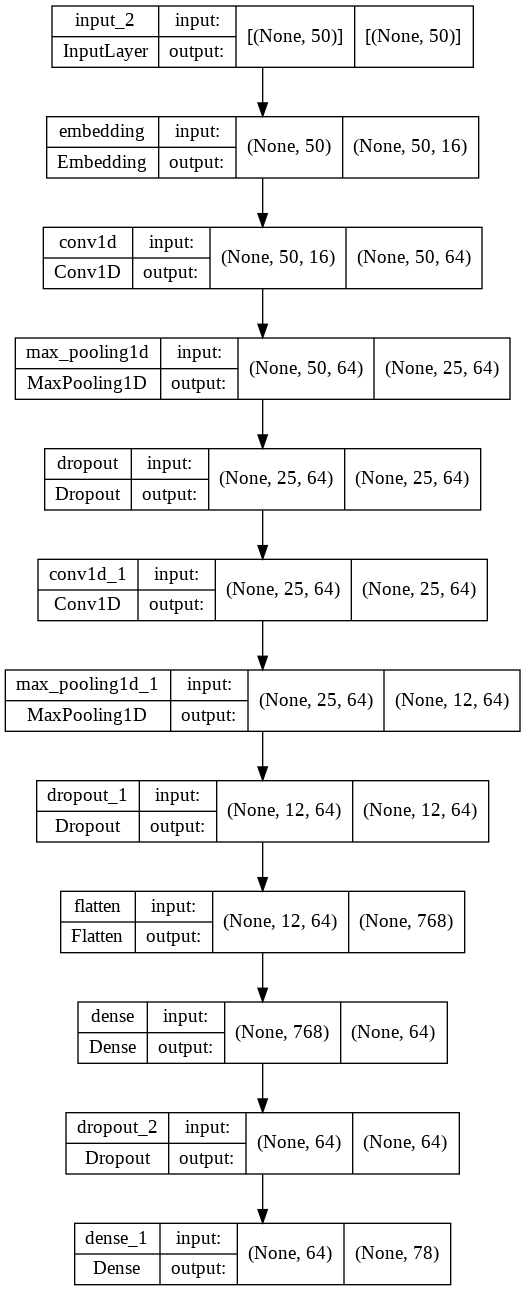

In [81]:
tf.keras.utils.plot_model(model_Conv1D,show_shapes=True)



### TRAIN

we have the train, validation, and test datasets ready to input any ML/DL models. Now, we will use the train and validation datasets to train the model.

In [82]:
history=model_Conv1D.fit(train_ds,validation_data=val_ds,verbose=1, epochs=100,  class_weight=weights)

Epoch 1/100
32/32 [==============================] - 2s 30ms/step - loss: 55.1923 - sparse_categorical_accuracy: 0.0645 - val_loss: 3.7549 - val_sparse_categorical_accuracy: 0.0833
Epoch 2/100
32/32 [==============================] - 1s 19ms/step - loss: 41.7601 - sparse_categorical_accuracy: 0.0972 - val_loss: 3.8637 - val_sparse_categorical_accuracy: 0.0833
Epoch 3/100
32/32 [==============================] - 1s 19ms/step - loss: 40.2847 - sparse_categorical_accuracy: 0.1016 - val_loss: 3.9788 - val_sparse_categorical_accuracy: 0.0833
Epoch 4/100
32/32 [==============================] - 1s 19ms/step - loss: 39.6770 - sparse_categorical_accuracy: 0.0996 - val_loss: 3.9845 - val_sparse_categorical_accuracy: 0.0833
Epoch 5/100
32/32 [==============================] - 1s 19ms/step - loss: 38.2623 - sparse_categorical_accuracy: 0.1143 - val_loss: 3.9560 - val_sparse_categorical_accuracy: 0.1354
Epoch 6/100
32/32 [==============================] - 1s 19ms/step - loss: 34.0434 - sparse_cate

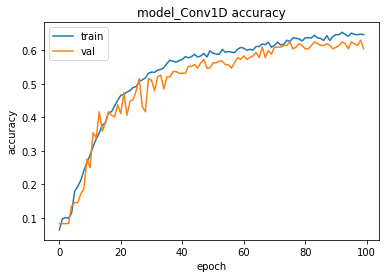

In [83]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model_Conv1D accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

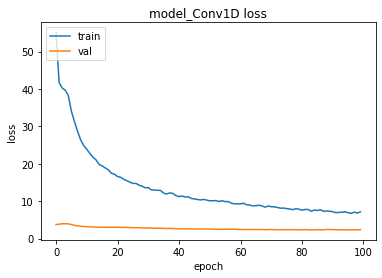

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_Conv1D loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Save the trained model

In [85]:
tf.keras.models.save_model(model_Conv1D, 'MultiClassTextClassification_Conv1D')

INFO:tensorflow:Assets written to: MultiClassTextClassification_Conv1D/assets


## TEST

In [86]:
loss, accuracy = model_Conv1D.evaluate(test_ds)
print("Test accuracy: ", accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 2.5265 - sparse_categorical_accuracy: 0.6094
Test accuracy:  0.609375


In [87]:
preds = model_Conv1D.predict(test_ds)
preds = preds.argmax(axis=1)

We can also get the actual (true) class of the given Name as follows:

In [88]:
actuals = test_ds.unbatch().map(lambda x,y: y)  
actuals=list(actuals.as_numpy_iterator())

By comparing the preds and the actuals values, we can measure the model performance as below.

In [89]:
# print(list(preds))

In [90]:
# print(actuals)

## Classification Report

In [91]:
from sklearn import metrics
print(metrics.classification_report(actuals, preds, digits=4))

              precision    recall  f1-score   support

           2     0.0000    0.0000    0.0000         4
           3     0.0000    0.0000    0.0000         8
           4     0.0000    0.0000    0.0000        13
           5     0.0000    0.0000    0.0000        11
           6     0.0000    0.0000    0.0000         2
           7     0.0000    0.0000    0.0000         2
           9     0.0000    0.0000    0.0000         3
          10     0.0000    0.0000    0.0000         4
          13     0.0000    0.0000    0.0000         2
          15     0.0000    0.0000    0.0000         3
          16     0.0000    0.0000    0.0000         2
          18     0.0000    0.0000    0.0000         2
          21     0.0000    0.0000    0.0000         2
          22     0.0000    0.0000    0.0000         1
          36     0.0000    0.0000    0.0000         2
          37     0.2500    1.0000    0.4000         2
          39     0.6875    0.8148    0.7458        27
          41     0.0000    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Confusion Matrix

Confusion Matrix is used to know the performance of a Machine learning model at classification. The results are presented in a matrix form. Confusion Matrix gives a comparison between Actual and Predicted values. The numbers on the diagonal are the number of the correct predictions.

In [92]:
#The below matrix gives an error becaause not all the labels were present in the splited test data.  (ValueError: Shape of passed values is (48, 48), indices imply (78, 78))

# from sklearn.metrics import confusion_matrix
# # Creating  a confusion matrix, 
# # which compares the y_test and y_pred
# cm = confusion_matrix(actuals, preds)
# cm_df = pd.DataFrame(cm, index = id_to_category.values() ,columns = id_to_category.values())

In [93]:
# cm_df

In [94]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15,8))
# ax = sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.1%', cmap='Blues')

# ax.set_title('Confusion Matrix\n\n');
# ax.set_xlabel('\nPredicted')
# ax.set_ylabel('Actual');

# ax.xaxis.set_ticklabels(id_to_category.values())
# ax.yaxis.set_ticklabels(id_to_category.values())

# ## Display the visualization of the Confusion Matrix.
# plt.show()

## **Create an End-to-End model**

In the code above, we applied the TextVectorization layer to the dataset before feeding text to the model. If you want to make your model capable of processing raw strings (for example, to simplify deploying it), you can include the TextVectorization layer inside your model. You can call this model as an End-to-End model.

To do so, you can create a new model using the TextVectorization layer (vectorize_layer) we just trained as the first layer.

In [95]:
end_to_end_model = tf.keras.Sequential([
  vectorize_layer,
  model_Conv1D,
  layers.Activation('softmax')
])

end_to_end_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)


In [96]:
#df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NewRealWorld_DataLevel5.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/New_SXM_Test_Data.csv')

In [97]:
df_test.head()

,database_nm,db_cluster,schema_nm,table_nm,column_nm,privacy_term,privacy_tier,created_ts,updated_ts,update_flag,PRIVACY_UPDATE,NEW TERM,COMMENT
0,prod,Redshift_edw-prod,v_edw_datamart,v_fact_reacquisition_opportunity,deactivation_rsn_cd,Deactivation Reason Code,NaN,7/24/2022 19:30,7/28/2022 0:00,NaN,NaN,NaN,NaN
1,prod,Redshift_edw-prod,royalty_stg,dim_customer,modified_by,User Name,5.0,4/21/2022 0:51,6/28/2022 0:00,NaN,NaN,NaN,NaN
2,prod,Redshift_edw-prod,royalty_stg,dim_customer,user_login,Unique User Login,5.0,5/19/2022 0:53,6/28/2022 0:00,NaN,NaN,NaN,NaN
3,prod,Redshift_edw-prod,royalty_stg,dim_personal_station,create_user_nm,User Name,5.0,4/20/2022 0:54,6/28/2022 0:00,NaN,NaN,NaN,NaN
4,prod,Redshift_edw-prod,royalty_stg,dim_personal_station,update_user_nm,User Name,5.0,5/27/2022 0:53,6/28/2022 0:00,NaN,NaN,NaN,NaN


In [98]:
prod_test = df_test['column_nm'].tolist()
#prod_test = df_test['dta_schm_col_nm'].tolist()

Let's observe the prediction of `end_to_end_model` with the **raw text**:

In [99]:

predictions=end_to_end_model.predict(prod_test)
op_list = []
for pred in predictions:
  #print(str(pred))
  op_list.append(id_to_category[np.argmax(pred)])
  print(id_to_category[np.argmax(pred)])

Streaming output truncated to the last 5000 lines.
User Name
User Name
User Name
User Name
Email Address
Email Address
User Name
User Name
Credit Card Number
User Name
User Name
User Name
User Name
User Name
User Name
User Name
User Name
User Name
User Name
Email Address
Email Address
Email Address
User Name
User Name
User Name
Email Address
Email Address
Email Address
User Name
User Name
User Name
Email Address
Email Address
Email Address
Email Address
Email Address
Email Address
Email Address
User Name
User Name
User Name
User Name
User Name
User Name
State Province Region
Unique User Login
User Name
User Name
User Name
User Name
User Name
User Name
User Name
Email Address
Email Address
Email Address
Email Address
Email Address
Email Address
Email Address
User Name
User Name
User Name
User Name
User Name
User Name
Email Address
Email Address
Email Address
Email Address
Email Address
Email Address
Email Address
Email Address
User Name
User Name
User Name
User Name
User Name
Credit Car

In [100]:
# mylist = []
# for item in data:
#     mylist.append(item)
# mat = numpy.array(mylist)

predictions=end_to_end_model.predict(prod_test)
mylist = []

for pred in predictions:
  mylist.append(np.round(pred*100 ))

matrx = np.array(mylist)

matrx_max = np.amax(matrx, axis = 1)

In [101]:
print((matrx))

[[0. 0. 0. ... 1. 0. 3.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [102]:
df_test['final_output'] = op_list

In [103]:
df_test_nw = df_test.copy()

In [104]:
df_test_nw['Best score'] = matrx_max

In [105]:
df_test_nw.sample(5)

,database_nm,db_cluster,schema_nm,table_nm,column_nm,privacy_term,privacy_tier,created_ts,updated_ts,update_flag,PRIVACY_UPDATE,NEW TERM,COMMENT,final_output,Best score
4943,prod,Redshift_edw-prod,edw_ods_poc,m_fact_selfpay_subscription_jul_22_bkp,audio_srvc_start_dt,Audio Service Conversion Start Date,3.0,7/26/2022 12:07,7/28/2022 0:00,NaN,NaN,NaN,NaN,Email Address,80.0
15274,prod,Redshift_edw-prod-rpt-consumer,edw_datamart,v_fact_subscription_snapshot,l90d_avg_dly_lstn_durn_sec_qty,Listening Duration Quantity,3.0,5/14/2022 1:49,6/28/2022 0:00,NaN,NaN,NaN,NaN,User Name,54.0
8382,prod,Redshift_edw-prod,edw_datamart_stg,stg_cc_chat_get_hhld,prnt_acct_key_id,Parent Account Number,4.0,4/8/2022 16:38,6/28/2022 0:00,NaN,NaN,NaN,NaN,Unique User Login,93.0
4290,prod,Redshift_edw-prod,edw_ods_poc,idm_service_history_us,sbscrptn_id,Subscription Identifier,4.0,7/15/2022 13:51,7/21/2022 0:00,NaN,NaN,NaN,NaN,Unique User Login,99.0
11969,prod,Redshift_edw-prod-rpt-consumer,edw_datamart_can,fact_trial_subscription,l30d_ttl_smpc_lstn_durn_sec_qty,Listening Duration Quantity,3.0,5/14/2022 1:34,6/28/2022 0:00,NaN,NaN,NaN,NaN,User Name,54.0


In [106]:
from google.colab import files
df_test_nw.to_csv('PIDiscovery_Output_30.csv')
files.download('PIDiscovery_Output_30.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>